# Principal Component Analysis (PCA)

We'll perform PCA on the wine dataset to reduce the 13-dimensional feature set to 2-dimensional subspace.

## Import libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
pd.options.display.max_columns = None

## Load data into the dataframe

In [3]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

print('Training:', X_train.shape, y_train.shape)
print('Testing :', X_test.shape, y_test.shape)

Training: (124, 13) (124,)
Testing : (54, 13) (54,)


In [11]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,12.53,5.51,2.64,25.0,96.0,1.79,0.60,0.63,1.10,5.000000,0.82,1.69,515.0
1,11.87,4.31,2.39,21.0,82.0,2.86,3.03,0.21,2.91,2.800000,0.75,3.64,380.0
2,12.77,2.39,2.28,19.5,86.0,1.39,0.51,0.48,0.64,9.899999,0.57,1.63,470.0
3,14.38,1.87,2.38,12.0,102.0,3.30,3.64,0.29,2.96,7.500000,1.20,3.00,1547.0
4,12.77,3.43,1.98,16.0,80.0,1.63,1.25,0.43,0.83,3.400000,0.70,2.12,372.0


In [12]:
pd.DataFrame(X_test).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,12.60,1.34,1.90,18.5,88.0,1.45,1.36,0.29,1.35,2.45,1.04,2.77,562.0
1,12.51,1.24,2.25,17.5,85.0,2.00,0.58,0.60,1.25,5.45,0.75,1.51,650.0
2,12.37,1.13,2.16,19.0,87.0,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420.0
3,14.16,2.51,2.48,20.0,91.0,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660.0
4,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0


## PCA implementation

### 1. Standardization

In [13]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [16]:
X_train_sc.shape, X_test_sc.shape

((124, 13), (54, 13))

In [14]:
pd.DataFrame(X_train_sc).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.530148,3.014230,0.983911,1.622480,-0.312792,-0.922055,-1.579634,2.235167,-0.845975,0.134266,-0.670080,-1.456630,-0.743900
1,-1.326390,1.892095,0.064368,0.465565,-1.282447,0.823142,0.978273,-1.207823,2.157831,-0.883736,-0.981178,1.498178,-1.150884
2,-0.240605,0.096679,-0.340231,0.031722,-1.005403,-1.574465,-1.674371,1.005528,-1.609373,2.401634,-1.781145,-1.547547,-0.879562
3,1.701745,-0.389580,0.027586,-2.137494,0.102775,1.540793,1.620381,-0.552016,2.240809,1.291086,1.018739,0.528395,2.367265
4,-0.240605,1.069196,-1.443683,-0.980579,-1.420969,-1.183019,-0.895420,0.595648,-1.294056,-0.606099,-1.203391,-0.805057,-1.175002


In [15]:
pd.DataFrame(X_test_sc).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.445698,-0.885190,-1.737937,-0.257507,-0.866881,-1.476604,-0.779630,-0.552016,-0.431084,-1.045691,0.307657,0.179879,-0.602210
1,-0.554276,-0.978701,-0.450576,-0.546736,-1.074664,-0.579540,-1.600687,1.989239,-0.597040,0.342494,-0.981178,-1.729382,-0.336916
2,-0.723176,-1.081563,-0.781612,-0.112893,-0.936142,1.866998,1.051957,-1.371775,0.431887,-0.120235,1.107624,0.331408,-1.030296
3,1.436331,0.208892,0.395404,0.176336,-0.659097,-1.101468,-1.474370,0.677624,-0.613636,2.309088,-1.558932,-1.426324,-0.306770
4,0.893438,3.145145,0.285058,0.320951,-0.382053,-1.101468,-1.569108,1.333432,-0.912357,1.383632,-1.470046,-1.380866,-0.065594


### 2. Covariance matrix

In [17]:
cov_mat = np.cov(X_train_sc.T)

In [18]:
pd.DataFrame(cov_mat)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.008130,0.013664,0.268530,-0.339659,0.315400,0.349680,0.327443,-0.135136,0.112411,0.611168,-0.014085,0.110320,0.697789
1,0.013664,1.008130,0.163425,0.309621,-0.104903,-0.278164,-0.375007,0.251103,-0.132639,0.195992,-0.563266,-0.285186,-0.208206
2,0.268530,0.163425,1.008130,0.409273,0.223293,0.127541,0.075254,0.258408,-0.059475,0.311080,-0.104885,-0.014994,0.216402
3,-0.339659,0.309621,0.409273,1.008130,-0.115093,-0.343870,-0.423413,0.392692,-0.216634,-0.064645,-0.298738,-0.278681,-0.468033
4,0.315400,-0.104903,0.223293,-0.115093,1.008130,0.224537,0.175402,-0.253743,0.231470,0.220289,0.117916,0.072388,0.424621
5,0.349680,-0.278164,0.127541,-0.343870,0.224537,1.008130,0.872251,-0.418979,0.574760,0.076835,0.376761,0.690447,0.540536
6,0.327443,-0.375007,0.075254,-0.423413,0.175402,0.872251,1.008130,-0.510575,0.641736,-0.047403,0.482750,0.765440,0.541451
7,-0.135136,0.251103,0.258408,0.392692,-0.253743,-0.418979,-0.510575,1.008130,-0.317279,0.044882,-0.156121,-0.446532,-0.297765
8,0.112411,-0.132639,-0.059475,-0.216634,0.231470,0.574760,0.641736,-0.317279,1.008130,0.028952,0.252646,0.484475,0.295251
9,0.611168,0.195992,0.311080,-0.064645,0.220289,0.076835,-0.047403,0.044882,0.028952,1.008130,-0.433170,-0.340353,0.423756


### 3. Eigen vectors and Eigen values

In [19]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

In [20]:
eigen_vals

array([4.62707368, 2.51386206, 1.38553282, 1.11674482, 0.89157219,
       0.64717927, 0.57806401, 0.08663137, 0.16917448, 0.31754253,
       0.28943846, 0.23094038, 0.25193501])

In [21]:
pd.DataFrame(eigen_vecs)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.211549,-0.457042,-0.154587,-0.086783,-0.241488,0.109379,0.155625,0.123305,-0.326128,0.389973,0.458148,-0.320607,0.184664
1,-0.218678,-0.232489,0.147492,0.536830,-0.027945,0.049001,0.673141,-0.076563,0.062619,0.110952,-0.245826,-0.091000,-0.202690
2,-0.004138,-0.350514,0.590736,-0.249863,-0.039337,0.234835,-0.074892,0.161825,-0.010281,-0.235500,-0.387456,-0.208001,0.358161
3,-0.271355,-0.028780,0.567978,-0.001090,0.184920,0.079573,-0.269059,-0.097935,-0.064401,0.543056,0.245261,0.238391,-0.253745
4,0.171965,-0.246814,0.017648,-0.235732,0.802380,-0.091963,0.264050,-0.122504,0.020732,-0.223223,0.232525,-0.051105,-0.098446
5,0.398820,-0.030809,0.214489,0.146344,-0.140639,0.013011,-0.103575,0.444181,-0.163470,-0.297293,0.092521,-0.041091,-0.647490
6,0.427171,0.049514,0.174593,0.122369,-0.141499,0.030153,-0.093460,-0.798820,-0.274720,-0.090137,-0.072334,-0.103236,-0.048491
7,-0.278392,-0.085105,0.239810,-0.314081,-0.403147,-0.549378,0.253953,-0.140190,0.004391,-0.301203,0.312506,0.141616,-0.046387
8,0.297095,0.036753,0.191907,0.371528,0.162205,-0.693953,-0.102303,0.206494,-0.064874,0.188802,-0.093212,-0.011849,0.354757
9,0.015148,-0.551597,-0.160023,0.085857,-0.088568,-0.177737,-0.391364,-0.171042,0.609411,0.040242,-0.044328,-0.152439,-0.206087


Plot the __variance explained ratios__ of the eigen values.

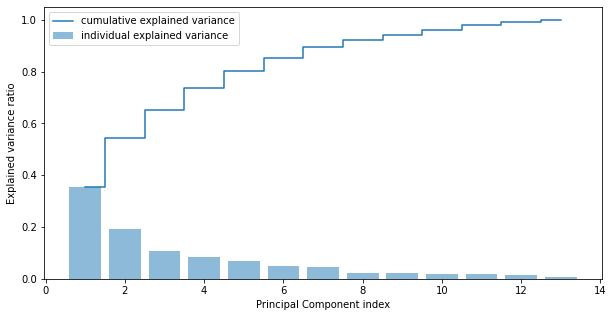

In [23]:
# calculate the cumulative sum of explained variances
tot = sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# Plot the explained variances
plt.figure(figsize=(10, 5))
plt.bar(range(1,14), var_exp, alpha=0.5,
    align='center', label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid',
    label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal Component index')
plt.legend(loc='best')
plt.show()

First two components itself explains almost 60% of the variance in the dataset.

### 4. Feature transformation

In [24]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda t: t[0], reverse=True)

In [25]:
eigen_pairs

[(4.6270736800170535,
  array([ 0.21154857, -0.21867764, -0.00413849, -0.27135466,  0.17196468,
          0.39882027,  0.42717087, -0.27839248,  0.29709513,  0.01514824,
          0.25977782,  0.34875291,  0.32796637])),
 (2.5138620578450084,
  array([-0.45704203, -0.23248866, -0.35051363, -0.0287805 , -0.24681407,
         -0.03080897,  0.0495137 , -0.08510489,  0.03675291, -0.55159693,
          0.29602583,  0.20960172, -0.32347881])),
 (1.385532823515851,
  array([-0.15458736,  0.14749225,  0.5907357 ,  0.56797783,  0.0176484 ,
          0.21448929,  0.17459291,  0.23981006,  0.19190728, -0.16002349,
          0.07484467,  0.25775716, -0.11830566])),
 (1.1167448175382029,
  array([-0.08678298,  0.53683011, -0.2498635 , -0.00108953, -0.23573165,
          0.14634388,  0.12236872, -0.31408132,  0.37152781,  0.08585655,
         -0.49771842,  0.15659189, -0.18328439])),
 (0.8915721873600938,
  array([-0.24148778, -0.02794457, -0.03933739,  0.18491969,  0.80237988,
         -0.14063863,

In [26]:
W = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W: \n', W)

Matrix W: 
 [[ 0.21154857 -0.45704203]
 [-0.21867764 -0.23248866]
 [-0.00413849 -0.35051363]
 [-0.27135466 -0.0287805 ]
 [ 0.17196468 -0.24681407]
 [ 0.39882027 -0.03080897]
 [ 0.42717087  0.0495137 ]
 [-0.27839248 -0.08510489]
 [ 0.29709513  0.03675291]
 [ 0.01514824 -0.55159693]
 [ 0.25977782  0.29602583]
 [ 0.34875291  0.20960172]
 [ 0.32796637 -0.32347881]]


Using the projection matrix, we can now transform a sample x (represented as a 1 x 13-dimensional row vector) onto the PCA subspace (the principal components one and two) obtaining x′, now a two-dimensional sample vector consisting of two new features:  
![Feature transformation](https://miro.medium.com/max/152/1*nuYZrTF8trabAfJq-3wVcA.png)

In [27]:
X_train_sc[0].dot(W)

array([-4.10953808, -1.38106252])

In [28]:
X_train_pca = X_train_sc.dot(W)

In [30]:
pd.DataFrame(X_train_pca).head()

,0,1
0,-4.109538,-1.381063
1,0.558782,1.535386
2,-3.607874,-1.616989
3,4.413728,-1.564211
4,-2.649520,0.829652


### Visualize the transformed data

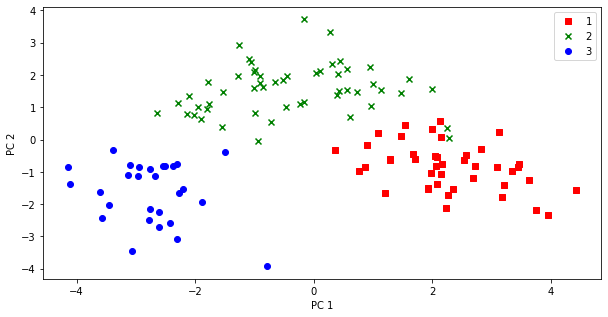

In [32]:
colors = ['r', 'g', 'b']
markers = ['s', 'x', 'o']
plt.figure(figsize=(10, 5))
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0],
        X_train_pca[y_train==l, 1],
        c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='best')
plt.show()